# CSC-321: Data Mining and Machine Learning

# Final Project

## Working with scikit-learn
## Bobby Headrick

### Abstract

For this project we run multiple classification algorithms to attempt to classify mushrooms based on whether or not they are edible.  We will be comparing the performance of each algorithm to one another to see which algorithm or algorithms perform best.  We will also compare and analyze the features of our dataset to see which features are best for classifying our data.

### Introduction

When people see a mushroom in the wilderness, the general consensus is to not eat it.  Many types of mushrooms are edible and appealing to people, but there are also many types which are poisonous.  Unlike poison ivy or othere plants which are harmful to people, there is no one 'rule' for determining if a mushroom is poisonous, such as poison ivy and poison oak's 'leaves of three' rule.  Our goal in this paper to classify mushrooms as either edible or poisonous based on a set of visual features and olfactible features (odor).

### Motivation

We are attempting to classify mushrooms because it is a problem that can only confidently be solved with a classification success rate of 100%.  Anything lower than that and the classification results have a chance of poisoning someone.  Classification of the mushroom dataset has been done before, such as at https://towardsdatascience.com/building-a-perfect-mushroom-classifier-ceb9d99ae87e.  This project also aimed for perfect classification, again because a classifier for determing whether something is edible or not is only helpful with perfect accuracy.

### Data

Our dataset contains a variety of mushrooms, described by their physical traits.  The dataset contains 8,124 instances and each instance has 23 features, such as colors of different parts, shapes of different parts, habitat and odor.  For each feature, a letter represents the category name.  We use one-hot encoding to divide the each feature into separate, binary features, with 1 representing that a feature is true for a given mushroom, and 0 representing false.  For example, consider the 'gill spacing' feature.  This has three categories:
    1. C = close
    2. W = crowded
    3. D = distant
One-hot encoding divides the gill spacing feature into three features:
    1. gill-spacing_c
    2. gill-spacing_w
    3. gill-spacing_d
The reason why we do this instead of changing (C,W,D) to (0,1,2) is because we do not want D to be considered more important than the other two categories just because 2 is the largest of the numbers.  Before one-hot encoding, our dataset has 23 features.  After, there are 118 features.
    Our dataset also has some missing values, only in the stalk-root category.  Our one-hot encoding separates these missing values into a separate category, so we remove the column witht the pandas drop method.  Even if this feature is ranked highly in determining whether a mushroom is poisonous, we do not want it because it means nothing to us and can make our classifications incorrect.

### Experiments

We begin by running a model comparison of classification and regression algorithms on our data and gather the results using the accuracy evaluation metric.  T tests are conducted on the results of the metrics, and models that accept the null hypothesis or perform worse than others are discarded.  
    We run a recursive feature elimination ranking function on our data using logistic regression to rank the influence of features on classification.  Only features with a score of 1 are saved.

### Results

We immediately notice that many models immediately scored 100% success for classifying our data.  The only models that did not acheive this score were ZeroR, Naive Bayes, and a standard SVM.

- ZR: 0.517973 (0.017422)
- LR: 1.000000 (0.000000)
- KN5: 1.000000 (0.000000)
- KN7: 1.000000 (0.000000)
- DT: 1.000000 (0.000000)
- NB: 0.957041 (0.006709)
- SVM: 0.999016 (0.001205)
- LIN: 1.000000 (0.000000)
- RF: 1.000000 (0.000000)
- NN: 1.000000 (0.000000)

We have a lot of models to choose from, so we run an RFE ranking to evaluate how the algorithms which had 100% success perform when only using features with the highest rankings.  This narrows the feature list down from 117 to 59 using logistic regression as our estimator.  Our results are:

- KN5: 1.000000 (0.000000)
- KN7: 1.000000 (0.000000)
- DT: 1.000000 (0.000000)
- LIN: 1.000000 (0.000000)
- RF: 1.000000 (0.000000)

We plot the decision tree to view which features had the most influence on our classification.
<img src="files/graph.png">

### Conclusions

We see that a mushroom having no odor is the feature with the strongest correlation to whether a mushroom is poisonous or edible.  By splitting our features into binary categories, we are able to accuratly classify our mushrooms, even using only half of the features.  We acheived the necessary 100% success to ensure that our classification is actually useful.

length:  117
ZR: 0.517973 (0.017422)
LR: 1.000000 (0.000000)
KN5: 1.000000 (0.000000)
KN7: 1.000000 (0.000000)
DT: 1.000000 (0.000000)
NB: 0.957041 (0.006709)
SVM: 0.999016 (0.001205)
LIN: 1.000000 (0.000000)
RF: 1.000000 (0.000000)
NN: 1.000000 (0.000000)


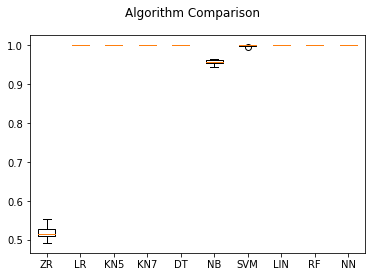


***Performing t-tests***


P-Val between ZeroR and Logistic Regression: 0.00
reject null hypothesis

P-Val between ZeroR Regression and Decision Tree: 0.00
reject null hypothesis


***Examining Features***


Feature names: ['class' 'cap-shape_b' 'cap-shape_c' 'cap-shape_f' 'cap-shape_k'
 'cap-shape_s' 'cap-shape_x' 'cap-surface_f' 'cap-surface_g'
 'cap-surface_s' 'cap-surface_y' 'cap-color_b' 'cap-color_c' 'cap-color_e'
 'cap-color_g' 'cap-color_n' 'cap-color_p' 'cap-color_r' 'cap-color_u'
 'cap-color_w' 'cap-color_y' 'bruises_f' 'bruises_t' 'odor_a' 'odor_c'
 'odor_f' 'odor_l' 'odor_m' 'odor_n' 'odor_p' 'odor_s' 'odor_y'
 'gill-attachment_a' 'gill-attachment_f' 'gill-spacing_c' 'gill-spacing_w'
 'gill-size_b' 'gill-size_n' 'gill-color_b' 'gill-color_e' 'gill-color_g'
 'gill-color_h' 'gill-color_k' 'gill-color_n' 'gill-color_o'
 'gill-color_p' 'gill-color_r' 'gill-color_u' 'gill-color_w'
 'gill-color_y' 'stalk-shape_e' 'stalk-shape_t' 'stalk-root_b'
 'stalk-root_c' 'stalk-root_e' 'sta

In [1]:
# Compare Algorithms
# From scikit learn tutorial
# With modification by Nick Webb

%matplotlib inline

# Pandas is an important data manipulation library
# You don't have to use it for your project, but I include it
# here so you know about it.

import pandas
import matplotlib.pyplot as plt
from scipy import stats
import graphviz 
from sklearn import tree

# Import models

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

# And import the feature selection mechanism

from sklearn.feature_selection import RFE

from sklearn.preprocessing import LabelEncoder


# load dataset, using pandas

dataframe = pandas.read_csv('mushrooms.csv')

le = LabelEncoder()
dataframe['class'] = le.fit_transform(dataframe['class'])

dataframe = pandas.get_dummies(dataframe)
# drop missing data
dataframe = dataframe.drop(columns = ['stalk-root_?'])
names = dataframe.columns.values

# get data from data frames, as numpy arrays
# note that by convention, we use X for input features
# and lower case y for the target class

array = dataframe.values
print('length: ', len(array[0]))
X = array[:,1:len(array[0])]
y = array[:,0]

# prepare configuration for cross validation test harness
seed = 1

# prepare models
models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KN5', KNeighborsClassifier()))
models.append(('KN7', KNeighborsClassifier(n_neighbors=7)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LIN', SVC(kernel='linear',gamma='auto')))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

# evaluate each model in turn
# note that I'm going to run through each model above
# performing a 10-fold cross-validation each time
# (n_splits = 10), specifying 'accuracy' as my measure

results = []
classifiers = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	classifiers.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)  
    
# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(classifiers)
plt.show()

print('\n***Performing t-tests***\n\n')

    
ttest,pval = stats.ttest_rel(results[1], results[0])
print('P-Val between ZeroR and Logistic Regression: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis") 

print()    
    
ttest,pval = stats.ttest_rel(results[0], results[4])
print('P-Val between ZeroR Regression and Decision Tree: %.2f' % pval)

if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
   
print('\n\n***Examining Features***\n\n')

log = LogisticRegression(solver='liblinear')
rfe = RFE(estimator=log, step=1)
rfe.fit(X, y)
print("Feature names:",names)
print("Feature ranking:",rfe.ranking_)

print('\n\n***Slicing data to include ONLY features ranked 1***\n\n')

# I use pandas (badly) to do this, slicing by column names
# I extract the column names from the ranking, above
# There's better ways to do this, but it's late and I'm tired

newCols = []
index = 0
for i in rfe.ranking_:
    if i <= 1:
        newCols.append(names[index])
    index+=1
newCols.append('class')    
newData = dataframe[dataframe.columns[dataframe.columns.isin(newCols)]]


# Extract the training and test data from the pandas data frame

array = newData.values
names = newData.columns.values
print('length: ', len(array[0]))
X = array[:,1:len(array[0])]
y = array[:,0]

# I'm going to perform a single 10-fold cross-validation
# Using my new data, and just two models
# Naive Bayes and Logistic Regression

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KN5', KNeighborsClassifier()))
models.append(('KN7', KNeighborsClassifier(n_neighbors=7)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LIN', SVC(kernel='linear',gamma='auto')))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results_4 = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results_4)
    classifiers.append(name)
    msg = "%s: %f (%f)" % (name, cv_results_4.mean(), cv_results_4.std())
    print(msg)
    